# Ejercicios para prácticar

Sos un data scientist que trabaja para una empresa de publicidad que lanzo una campaña de publicidad en una red social. Se registró cada usuario al que se le mostró la publicidad, y se pudo obtener datos de la persona tales como `genero`, `edad` y `salario estimado`. Además se registró si el usuario luego compró el producto que la publicidad hacia referencia. Los datos están en `Social_Network_Ads.csv`. Se busca poder predecir dado un usuario con datos socioseconomicos si va a comprar o no el producto.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/Vic-bit/aprMaqI_CEIA/main/clase3/ejercicios/datasets/Social_Network_Ads.csv"
social_network = pd.read_csv(url)

1. Realice un estudio de variables y de limpieza de datos. Analize las clases, estan balanceadas, o no? Qué clase nos parece mas importante de las dos?

In [4]:
social_network.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


Tenemos:
- User ID: es una variable categórica nominal	
- Gender: es una variable categórica nominal
- Age: es una varible continua de razón
- EstimatedSalary: 	es una varible continua de razón
- Purchased: es una varaible categórica nominal


In [5]:
social_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


No se ven datos faltantes

In [6]:
(social_network['Purchased']==1).value_counts()

Purchased
False    257
True     143
Name: count, dtype: int64

Se ve un desbalance de las clases donde la mayoría no compró el producto

In [7]:
#Como son No y Yes, le tenemos que poner 0 o 1
#social_network["Sexo"] = social_network["Gender"].apply(lambda x: "Si" if x == "Male" else "No")

#Convierte en 1 o 0 dependiendo de sexo
#social_network["Sexo"] = social_network["Gender"].apply(lambda x: 1 if x == "Male" else 0)

#One hot encoding
social_network["Male"] = social_network["Gender"].apply(lambda x: 1 if x == "Male" else 0)
social_network["Female"] = social_network["Gender"].apply(lambda x: 1 if x == "Female" else 0)

In [8]:
social_network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,Female
0,15624510,Male,19.0,19000.0,0,1,0
1,15810944,Male,35.0,20000.0,0,1,0
2,15668575,Female,26.0,43000.0,0,0,1
3,15603246,Female,27.0,57000.0,0,0,1
4,15804002,Male,19.0,76000.0,0,1,0


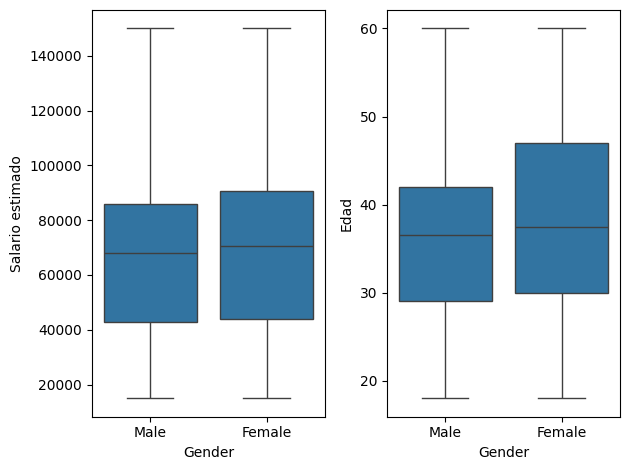

In [9]:
f, ax = plt.subplots(1,2)
sns.boxplot(data=social_network, y="EstimatedSalary", x="Gender", ax=ax[0])
sns.boxplot(data=social_network, y="Age", x="Gender", ax=ax[1])
ax[0].set_ylabel("Salario estimado")
ax[1].set_ylabel("Edad")
plt.tight_layout();

Se observa que el salario estimado así como la edad de las mujeres tiene una mayor desviación estándar pero una media similar que la de los hombres.

In [10]:
#X_categ = social_network[[,,]]
#X_cuali = 

social_network_feat = social_network[["Age","EstimatedSalary","Male","Female","Purchased"]]

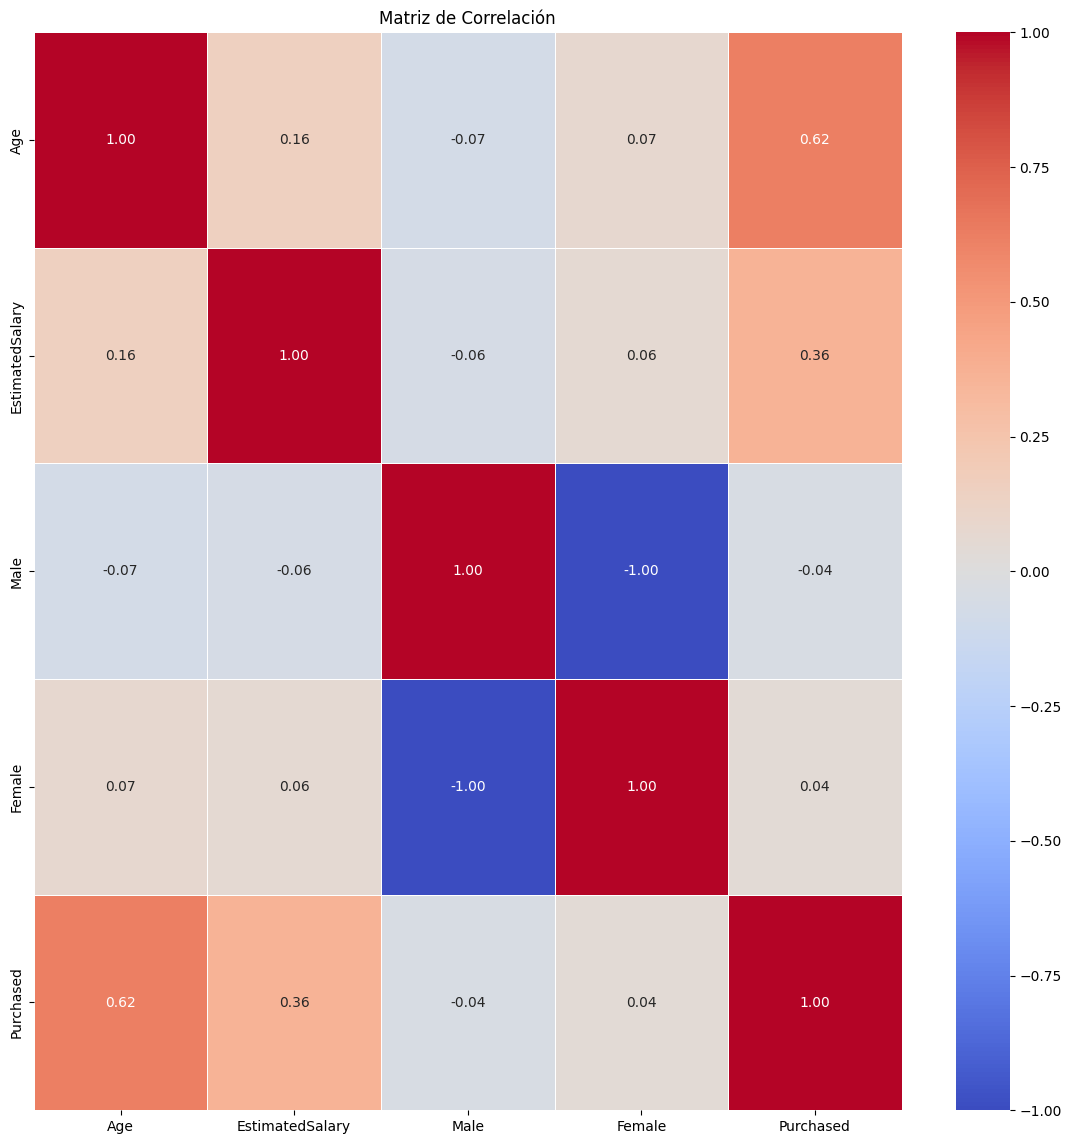

In [11]:
correlation_matrix = social_network_feat.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Se ve que lo haya comprado depende en gran medida de la edad y el estimado salario también pero en menor medida. Pero poco se relaciona con el sexo.

2. Separe el dataset en entrenamiento y validación.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_s = social_network["EstimatedSalary"].values
y_s = social_network["Purchased"].values
X_s = X_s.reshape([-1,1])
y_s = y_s.reshape([-1,1])
print('Cantidad de elementos de X: ', X_s.shape) #Para que quede vertical
print('Cantidad de elementos de y: ', y_s.shape)

Cantidad de elementos de X:  (400, 1)
Cantidad de elementos de y:  (400, 1)


In [14]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.20, random_state=42)

print('Los datos de X_train_s tienen una dimensión de: ', X_train_s.shape)
print('Los datos de X_test_s tienen una dimensión de: ', X_test_s.shape)
print('Los datos de y_train_s tienen una dimensión de: ', y_train_s.shape)
print('Los datos de y_test_s tienen una dimensión de: ', y_test_s.shape)

Los datos de X_train_s tienen una dimensión de:  (320, 1)
Los datos de X_test_s tienen una dimensión de:  (80, 1)
Los datos de y_train_s tienen una dimensión de:  (320, 1)
Los datos de y_test_s tienen una dimensión de:  (80, 1)


In [15]:
X_a = social_network["Age"].values
y_a = social_network["Purchased"].values
X_a = X_a.reshape([-1,1])
y_a = y_a.reshape([-1,1])
print('Cantidad de elementos de X: ', X_a.shape) #Para que quede vertical
print('Cantidad de elementos de y: ', y_a.shape)

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.20, random_state=42)

print('Los datos de X_train_s tienen una dimensión de: ', X_train_a.shape)
print('Los datos de X_test_s tienen una dimensión de: ', X_test_a.shape)
print('Los datos de y_train_s tienen una dimensión de: ', y_train_a.shape)
print('Los datos de y_test_s tienen una dimensión de: ', y_test_a.shape)

Cantidad de elementos de X:  (400, 1)
Cantidad de elementos de y:  (400, 1)
Los datos de X_train_s tienen una dimensión de:  (320, 1)
Los datos de X_test_s tienen una dimensión de:  (80, 1)
Los datos de y_train_s tienen una dimensión de:  (320, 1)
Los datos de y_test_s tienen una dimensión de:  (80, 1)


3. Elija diferente modelos de clasificación (al menos uno de regresión logistica y uno de KNN). Elija las variables de entrada en base al analisis del punto 1.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
regression_sal = LogisticRegression()
regression_sal.fit(X_train_s, y_train_s)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
social_network["EstimatedSalary"].max()

150000.0

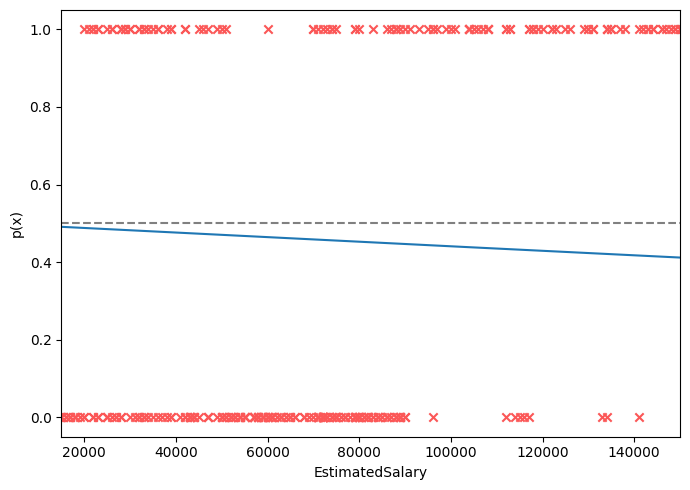

In [19]:
xx = np.linspace(np.min(X_train_s), np.max(X_train_s), 1000) #tomamos 1000 puntos entre esos dos valores y vamos a crear una nueva varaible de entrada
# Usando el metodo que nos da las probabilidades
yy = regression_sal.predict_proba(xx.reshape([-1, 1]))

plt.figure(figsize=(7, 5))
plt.plot([social_network["EstimatedSalary"].min(), social_network["EstimatedSalary"].max()], [0.5, 0.5], linestyle="--", color="gray")
plt.scatter(X_train_s, y_train_s, marker="x", color="#fb5757")
plt.plot(xx, yy[:, 1])
plt.xlabel("EstimatedSalary")
plt.ylabel("p(x)")
plt.xlim([np.min(X_train_s), np.max(X_train_s)])
plt.tight_layout()
plt.show()

Como se supuso, poco tiene que ver con el salario.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


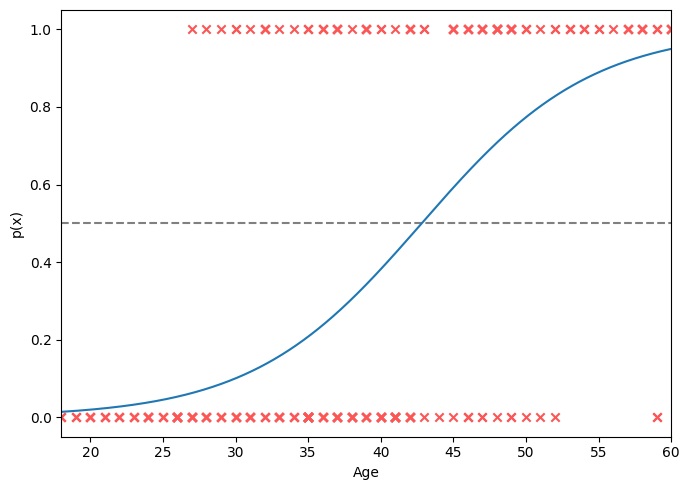

In [20]:
regression_age = LogisticRegression()
regression_age.fit(X_train_a, y_train_a)

max_age = social_network["Age"].max() 
min_age = social_network["Age"].min()

xx = np.linspace(np.min(X_train_a), np.max(X_train_a), 1000) #tomamos 1000 puntos entre esos dos valores y vamos a crear una nueva varaible de entrada
# Usando el metodo que nos da las probabilidades
yy = regression_age.predict_proba(xx.reshape([-1, 1]))

plt.figure(figsize=(7, 5))
plt.plot([min_age, max_age], [0.5, 0.5], linestyle="--", color="gray")
plt.scatter(X_train_a, y_train_a, marker="x", color="#fb5757")
plt.plot(xx, yy[:, 1])
plt.xlabel("Age")
plt.ylabel("p(x)")
plt.xlim([np.min(X_train_a), np.max(X_train_a)])
plt.tight_layout()
plt.show()



Dado que sexo es una variable boolena, podemos ver que probabilidad predice el modelo.

In [21]:
X_m = social_network.loc[:, ["Male"]].values
y_m = social_network.loc[:, "Purchased"].values
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_m, y_m, test_size = 0.25, random_state = 0)

# Entrenamos el modelo por máxima verosimilitud
regression_male = LogisticRegression()
regression_male.fit(X_train_male, y_train_male)

regression_male.predict_proba([[1], [0]])[:, -1]

array([0.34175592, 0.39713702])

In [22]:
X_a = social_network.loc[:, ["Female"]].values
y_m = social_network.loc[:, "Purchased"].values
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_a, y_m, test_size = 0.25, random_state = 0)

# Entrenamos el modelo por máxima verosimilitud
regression_female = LogisticRegression()
regression_female.fit(X_train_female, y_train_female)

regression_female.predict_proba([[1], [0]])[:, -1]

array([0.39713681, 0.34175564])

Tanto para male como para female da una probabilidad baja de compra. Esto está realcionado con las otras variables, por lo que no es 100% confiable.

Este sencillo ejemplo ilustra los peligros con la realización de regresiones que involucran un solo predictor cuando otros predictores también pueden ser relevantes.

---
### Modelo de regresión logistica multiple

Intentemos ahora ver ahora un modelo de regresión logistica con todas las entradas del dataset.

Pero antes de entrenar el modelo, veamos que la edad esta entre 18 y 60, y el salario entre 15000 y 150000, es decir salario tiene una variabilidad mucho mayor. Lo que queremos hacer es normalizar los features, para que evitemos que por cuestiones simplemente de unidades, una feature tenga mas relevancia que otra. 

In [23]:
social_network.describe()

,User ID,Age,EstimatedSalary,Purchased,Male,Female
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.490000,0.510000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,0.000000,1.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,1.000000


In [24]:
X = social_network.loc[:,["Age","EstimatedSalary","Male","Female"]].values
y = social_network.loc[:,"Purchased"].values
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #Llamamos al objeto

X_train_total = sc_X.fit_transform(X_train_total) #Usamo el método del sc para entrenar con X_train sin escalar, pero lo transformamos
X_test_total = sc_X.fit_transform(X_test_total) #Usamo el método del sc para entrenar con X_test sin escalar, pero lo transformamos


In [26]:
regression_total = LogisticRegression()
regression_total.fit(X_train_total, y_train_total)

LogisticRegression()

## Metricas de evaluación

Empecemos por la métrica más básica, el [accuracy]

In [27]:
# Empecemos por la metrica mas basica, el accuracy:
print(f"Porcentaje de muestras bien clasificadas usando solo EstimatedSalary es : {(regression_sal.score(X_test_s, y_test_s)*100)}%")
print(f"Porcentaje de muestras bien clasificadas usando solo Age es : {(regression_age.score(X_test_a, y_test_a)*100)}%")
print(f"Porcentaje de muestras bien clasificadas usando todos los atributos: {(regression_total.score(X_test_total, y_test_total)*100)}%")

Porcentaje de muestras bien clasificadas usando solo EstimatedSalary es : 65.0%
Porcentaje de muestras bien clasificadas usando solo Age es : 91.25%
Porcentaje de muestras bien clasificadas usando todos los atributos: 87.5%


A simple vista Age es el mejor, con una sola feature, pero usemos un modelo baseline que siempre diga que todos los clientes comprarán:

In [28]:
from sklearn.metrics import accuracy_score
prediccion_naive = np.zeros_like(y_test_a) 

print(f"Porcentaje de muestras bien clasificadas por el modelo naive: {accuracy_score(y_test_a, prediccion_naive)*100}%")

Porcentaje de muestras bien clasificadas por el modelo naive: 65.0%


Es decir, tenemos un gran desbalance de clases, en donde la positiva es mucho mas chica que la negativa. Usemos otras metricas si podemos ver como es el resultado.

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = regression_age.predict(X_test_a)
y_pred_total_test = regression_total.predict(X_test_total)


In [30]:
cm_age = confusion_matrix(y_test_a, y_pred_test)
cm_total = confusion_matrix(y_test_total, y_pred_total_test)
cm_naive = confusion_matrix(y_test_a, prediccion_naive)

Text(0.5, 1.0, 'Clasificador Naive')

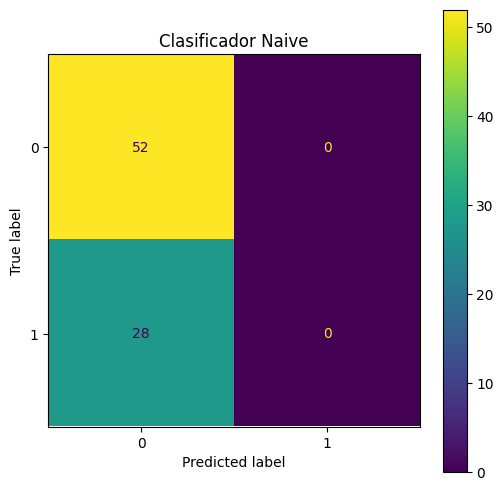

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive,
                              display_labels=regression_age.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive")

Text(0.5, 1.0, 'Clasificador Age')

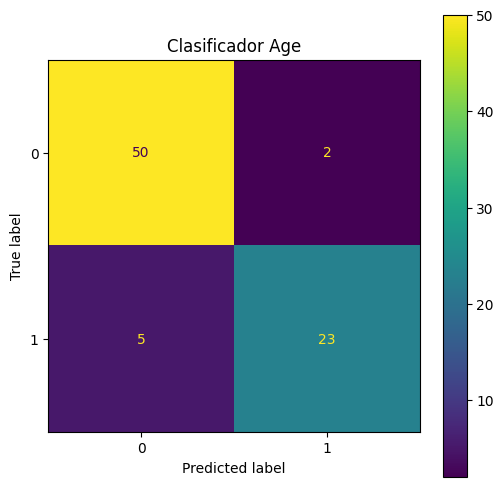

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_age,
                              display_labels=regression_age.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Age")

Text(0.5, 1.0, 'Clasificador Total')

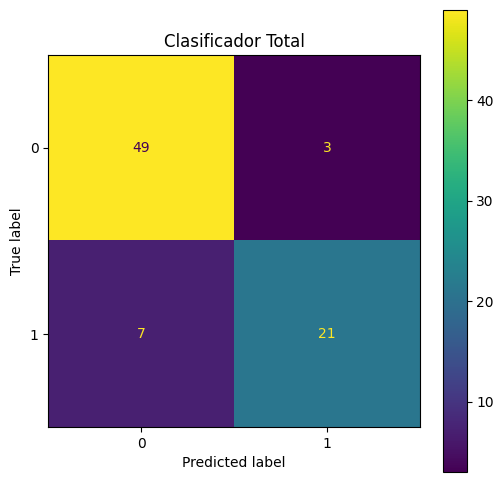

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_total,
                              display_labels=regression_total.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Total")

In [34]:
# Midamos la sensibilidad y especificidad
print("Modelo Naive")
P = np.sum(cm_naive[1, :])
N = np.sum(cm_naive[0, :])
TP = cm_naive[1, 1]
TN = cm_naive[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TP + TN)/2}")

print("\n")
print("Modelo 1 solo atributo")
P = np.sum(cm_age[1, :])
N = np.sum(cm_age[0, :])
TP = cm_age[1, 1]
TN = cm_age[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TP + TN)/2}")

print("\n")
print("Modelo todos los atributos")
P = np.sum(cm_total[1, :])
N = np.sum(cm_total[0, :])
TP = cm_total[1, 1]
TN = cm_total[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TP + TN)/2}")


Modelo Naive
Sensibilidad: 0.0
Especificidad: 1.0
Exactitud balanceada: 26.0


Modelo 1 solo atributo
Sensibilidad: 0.8214285714285714
Especificidad: 0.9615384615384616
Exactitud balanceada: 36.5


Modelo todos los atributos
Sensibilidad: 0.75
Especificidad: 0.9423076923076923
Exactitud balanceada: 35.0


In [35]:
from sklearn.metrics import precision_score, recall_score

print("Modelo Naive")
print(f"Precision: {precision_score(y_test_a, prediccion_naive, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test_a, prediccion_naive, zero_division=0)}")

print("\n")
print("Modelo 1 solo atributo")
print(f"Precision: {precision_score(y_test_a, y_pred_test, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test_a, y_pred_test, zero_division=0)}")

print("\n")
print("Modelo todos los atributos")
print(f"Precision: {precision_score(y_test_total, y_pred_total_test, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test_total, y_pred_total_test, zero_division=0)}")

Modelo Naive
Precision: 0.0
Recuperación: 0.0


Modelo 1 solo atributo
Precision: 0.92
Recuperación: 0.8214285714285714


Modelo todos los atributos
Precision: 0.875
Recuperación: 0.75


In [36]:
from sklearn.metrics import f1_score, fbeta_score

print("Modelo Naive")
print(f"F1-score: {f1_score(y_test_a, prediccion_naive, zero_division=0)}")
print(f"F2-score: {fbeta_score(y_test_a, prediccion_naive, zero_division=0, beta=2)}")
print(f"F0.5-score: {fbeta_score(y_test_a, prediccion_naive, zero_division=0, beta=0.5)}")

print("\n")
print("Modelo 1 solo atributo")
print(f"F1-score: {f1_score(y_test_a, y_pred_test, zero_division=0)}")
print(f"F2-score: {fbeta_score(y_test_a, y_pred_test, zero_division=0, beta=2)}")
print(f"F0.5-score: {fbeta_score(y_test_a, y_pred_test, zero_division=0, beta=0.5)}")

print("\n")
print("Modelo todos los atributos")
print(f"F1-score: {f1_score(y_test_total, y_pred_total_test, zero_division=0)}")
print(f"F2-score: {fbeta_score(y_test_total, y_pred_total_test, zero_division=0, beta=2)}")
print(f"F0.5-score: {fbeta_score(y_test_total, y_pred_total_test, zero_division=0, beta=0.5)}")

Modelo Naive
F1-score: 0.0
F2-score: 0.0
F0.5-score: 0.0


Modelo 1 solo atributo
F1-score: 0.8679245283018867
F2-score: 0.8394160583941606
F0.5-score: 0.8984375000000001


Modelo todos los atributos
F1-score: 0.8076923076923077
F2-score: 0.7720588235294118
F0.5-score: 0.8467741935483871


#### Curva ROC

Para podes crear la curva ROC debemos usar la probabilidad del modelo

In [37]:
# predict_proba() Nos permite obtener la probabilidad. Como tenemos dos clases, nos devuelve la probabilidad de las dos clases
# Nos quedamos con la clase 1 (que es la que nos importa)
prob_age = regression_age.predict_proba(X_test_a)[:, -1]
prob_total = regression_total.predict_proba(X_test_total)[:, -1]
prob_naive = np.zeros_like(prob_total)

In [38]:
from sklearn.metrics import auc, roc_curve

fpr_naive, tpr_naive, _ = roc_curve(y_test_a, prob_naive)
fpr_age, tpr_age, _ = roc_curve(y_test_a, prob_age)
fpr_total, tpr_total, _ = roc_curve(y_test_total, prob_total)


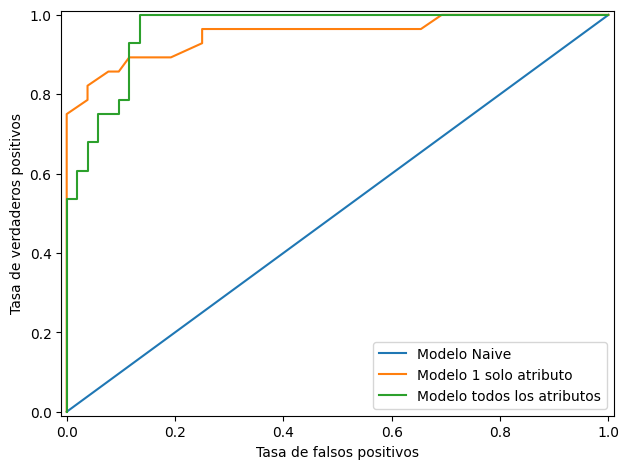

In [39]:
plt.plot(fpr_naive, tpr_naive, label="Modelo Naive") #Modelo ficticio
plt.plot(fpr_age, tpr_age, label="Modelo 1 solo atributo")
plt.plot(fpr_total, tpr_total, label="Modelo todos los atributos")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();


In [40]:
print("AUC")
print(f"Modelo Naive AUC: {auc(fpr_naive, tpr_naive)}")
print(f"Modelo 1 solo atributo AUC: {auc(fpr_age, tpr_age)}")
print(f"Modelo todos los atributos AUC: {auc(fpr_total, tpr_total)}")
#Es postivio que estén cerca de 1.

AUC
Modelo Naive AUC: 0.5
Modelo 1 solo atributo AUC: 0.9512362637362637
Modelo todos los atributos AUC: 0.9622252747252747


In [41]:
fpr_total, tpr_total, thr_total = roc_curve(y_test_total, prob_total)

value_tpr = np.max(tpr_total[fpr_total < 0.1]) #Seleccionamos el umbral
threshold_selected = thr_total[(tpr_total == value_tpr) & (fpr_total < 0.1)]

# Clasifiquemos con este nuevo valor
prob_total = regression_total.predict_proba(X_test_total)[:, -1] #Si es mayor que el umbral le ponemos 1, sino 0
y_pred_total_new = (prob_total >= threshold_selected).astype(float)


print("Knn con todos los atributos")
print(f"Precision: {precision_score(y_test_total, y_pred_total_new, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test_total, y_pred_total_new, zero_division=0)}")
print(f"F1-score: {f1_score(y_test_total, y_pred_total_new, zero_division=0)}")

cm_total = confusion_matrix(y_test_total, y_pred_total_new)
P = np.sum(cm_total[1, :])
N = np.sum(cm_total[0, :])
TP = cm_total[1, 1]
TN = cm_total[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")

Knn con todos los atributos
Precision: 0.8148148148148148
Recuperación: 0.7857142857142857
F1-score: 0.7999999999999999
Sensibilidad: 0.7857142857142857
Especificidad: 0.9038461538461539


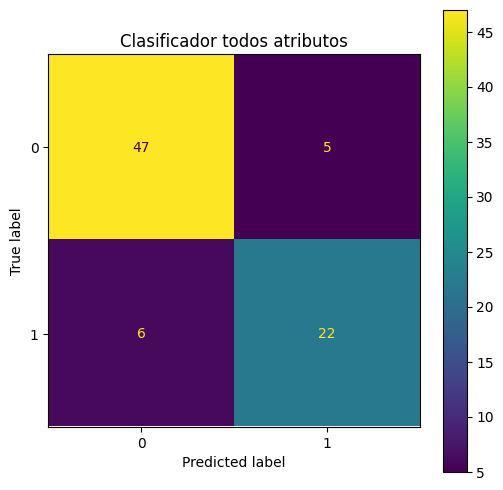

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_total,
                              display_labels=regression_total.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador todos atributos");
#Calculamos la matriz de confusion, subimos los TP

In [43]:
X = social_network.loc[:, ["Age", "EstimatedSalary"]].values #Entrenamos un modelo solo con balance e ingreso
y = social_network.loc[:, "Purchased"].values
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Normalizamos
sc_X = StandardScaler()
X_train_two = sc_X.fit_transform(X_train_two)  

# Entrenamos el modelo por máxima verosimilitud
classifier_two = LogisticRegression(random_state = 0, class_weight="balanced")
classifier_two.fit(X_train_two, y_train_two)
#Hacemos la regresión logística

# Crear la malla de puntos para el gráfico
X_set, y_set = X_test_two, y_test_two
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=1)
)

X_cont = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)

# Crear la malla de puntos para el gráfico
X_set, y_set = X_test_two, y_test_two
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=1)
)

X_cont = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_1035/2700067857.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


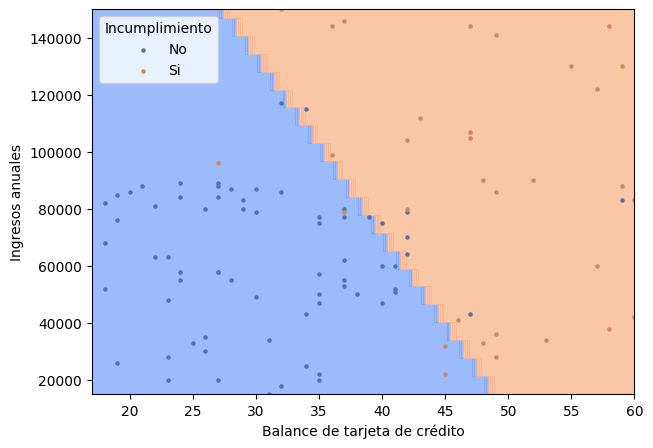

In [44]:
from matplotlib.colors import ListedColormap

# Crear el gráfico de contorno
plt.figure(figsize=(7, 5))
plt.contourf(
    X1, X2, classifier_two.predict(X_cont).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('#7aa5fb', '#f8b389'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
lab = ["No", "Si"]
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('#5471ab', '#d1885c'))(i), label=lab[i],
        s=5
    )

plt.xlabel('Balance de tarjeta de crédito') 
plt.ylabel('Ingresos anuales') 
plt.legend(title="Incumplimiento")

plt.show()
#Pintamos la línea que nos separa en el umbral en el que el modelo deja de decir
#que la combinación de variable no incumple y diga que sí incumple
#Vemos hay que muchos puntos azules, y muchos de ellos estan en la parte naranja, y tenemos muchos FP, 
#No tantos FN porque hay pocos naranja del lado izquierdo

## Clasificador KNN

In [45]:
X = social_network.loc[:,["Age", "EstimatedSalary", "Male", "Female"]].values
y = social_network.loc[:,"Purchased"].values
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y, test_size=0.2, random_state=42)

sc_X = StandardScaler() #Normalizamos
X_train_total = sc_X.fit_transform(X_train_total)
X_test_total = sc_X.fit_transform(X_test_total)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn_total = KNeighborsClassifier(n_neighbors=23, metric="minkowski", p=2)
classifier_knn_total.fit(X_train_total, y_train_total) #p=2 distancia euclediana

KNeighborsClassifier(n_neighbors=23)

In [47]:
y_pred_total = classifier_knn_total.predict(X_test_total)

cm_knn_total = confusion_matrix(y_test_total, y_pred_total)

In [48]:
print(f"Precision: {precision_score(y_test_total, y_pred_total, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test_total, y_pred_total, zero_division=0)}")
print(f"F1-scores: {f1_score(y_test_total, y_pred_total, zero_division=0)}")

P = np.sum(cm_knn_total[1,:])
N = np.sum(cm_knn_total[0,:])
TP = cm_knn_total[1,1]
TN = cm_knn_total[0,0]
print(f"Sensibilidad: {TP/P}") 
print(f"Especificidad: {TN/N}")

fpr_knn, tpr_knn, _ = roc_curve(y_test_total, y_pred_total)
print(f"Modelo Naive AUC: {auc(fpr_knn, tpr_knn)}")

Precision: 0.84
Recuperación: 0.75
F1-scores: 0.7924528301886793
Sensibilidad: 0.75
Especificidad: 0.9230769230769231
Modelo Naive AUC: 0.8365384615384616


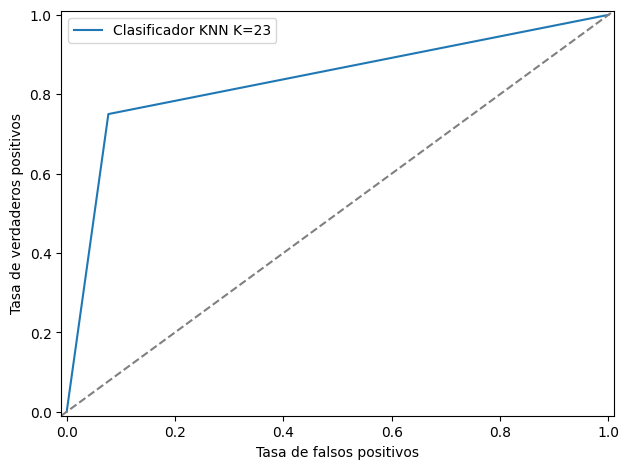

In [49]:
plt.plot(fpr_knn, tpr_knn, label="Clasificador KNN K=23")
plt.plot([-10, 10], [-10, 10], color="gray", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();
#No tenemos umbral, podemos var la TP vs FP, es una curva roc de un
#solo punto.

In [50]:
X = social_network.loc[:, ["Age", "EstimatedSalary"]].values
y = social_network.loc[:, "Purchased"].values
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

sc_X = StandardScaler()
X_train_two = sc_X.fit_transform(X_train_two)

classifier_knn_two = KNeighborsClassifier(n_neighbors=23, metric="minkowski", p=2)
classifier_knn_two.fit(X_train_two, y_train_two)
#Hacemos la frontera donde decimos que era negativo o postitivo, pero con el modelo de KNN


KNeighborsClassifier(n_neighbors=23)

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_1035/3749757271.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


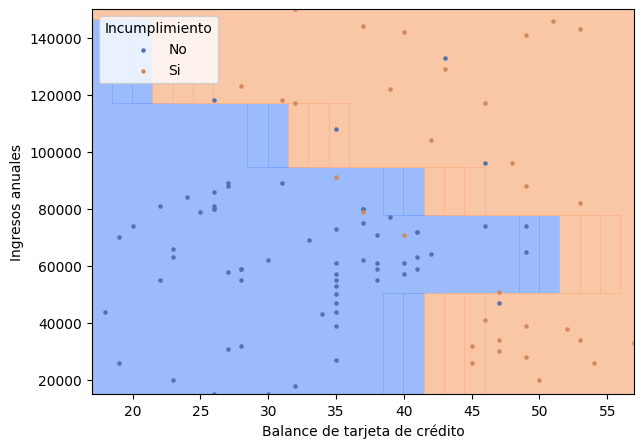

In [52]:
# Crear la malla de puntos para el gráfico
X_set, y_set = X_test_two, y_test_two
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=10),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=10)
)

X_cont = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)

# Crear el gráfico de contorno
plt.figure(figsize=(7, 5))
plt.contourf(
    X1, X2, classifier_knn_two.predict(X_cont).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('#7aa5fb', '#f8b389'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
lab = ["No", "Si"]
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('#5471ab', '#d1885c'))(i), label=lab[i],
        s=5
    )

plt.xlabel('Balance de tarjeta de crédito') 
plt.ylabel('Ingresos anuales') 
plt.legend(title="Incumplimiento")

plt.show()